In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('data/drug200.csv')
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
# Check if there are any missing values
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
# Check the shape of the dataset
df.shape

(200, 6)

In [5]:
# Check the data types of each column
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

<AxesSubplot:>

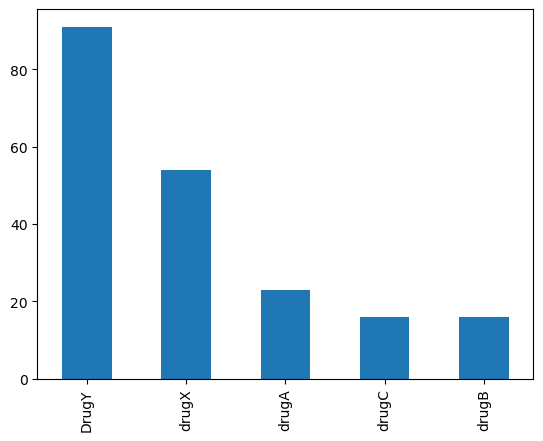

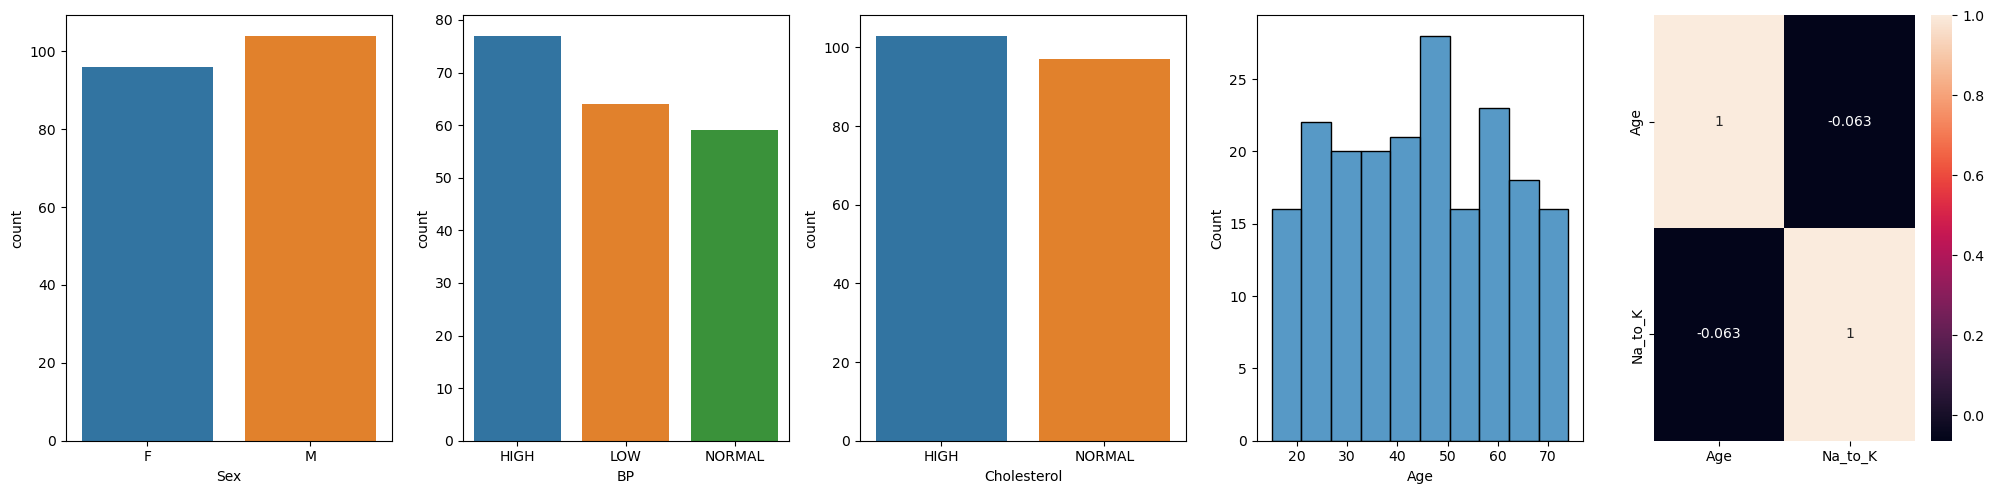

In [6]:
# Check the distribution of the target variable
df['Drug'].value_counts().plot(kind='bar')

# Check the distribution of each feature
fig, axs = plt.subplots(ncols=5, figsize=(20,5))
sns.countplot(x='Sex', data=df, ax=axs[0])
sns.countplot(x='BP', data=df, ax=axs[1])
sns.countplot(x='Cholesterol', data=df, ax=axs[2])
sns.histplot(x='Age', data=df, bins=10, ax=axs[3])
sns.histplot(x='Na_to_K', data=df, bins=10, ax=axs[4])
plt.tight_layout()

# Check the correlation between the features
sns.heatmap(df.corr(), annot=True)


In [7]:
# Encode the categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])


In [8]:
X = df.drop(['Drug'], axis=1)
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
y_pred
#print(classification_report(y_test, y_pred))

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA'], dtype=object)

In [9]:
X_test.iloc[5]

Age            51.000
Sex             1.000
BP              0.000
Cholesterol     0.000
Na_to_K        18.295
Name: 115, dtype: float64

In [15]:
rf.predict(X_test.iloc[5].values.reshape(1, -1))

c:\Users\Partha Mallik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['DrugY'], dtype=object)

In [16]:
rf.predict([X_test.iloc[5]]) 

c:\Users\Partha Mallik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['DrugY'], dtype=object)

In [17]:
y_test.iloc[5]

'DrugY'

In [13]:
from joblib import dump, load
dump(rf, 'model_v1.joblib')

['model_v1.joblib']

In [19]:
clf = load('model_v1.joblib')
clf.predict([X_test.iloc[5]])

c:\Users\Partha Mallik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['DrugY'], dtype=object)